In [365]:
# Verinin incelenmesi için oluşturulan sınıf.
#Bu sınıf otomatik olarak veri hakkında ön bilgi verecek ve görselleştirilmesini sağlayacak

class DataInspect:
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stats
    
    
    def __init__(self,data):
        self.data = data
    
    
    #Veri için açıklayıcı özet çıkaracak fonksiyon
    def preInfo(self):
        #Verinin ilk 10 satırını gösterme
        print('\033[1m' + "First 10 row of the data\n" + '\033[0m')
        print(self.data.head(10))
        
        #Verinin veri tiplerini görüntüleme
        print('\033[1m' + "\n\nTypes of the columns\n" + '\033[0m')
        print(self.data.dtypes)
        
        #Verinin özet açıklaması ( mean , std. min , max vb.)
        print('\033[1m' + "\n\nDescription of the data\n" + '\033[0m')
        print (self.data.describe())
        
        #Verideki eksik değerlerin kolonlara göre sayısı
        print('\033[1m' + "\n\nNumber of null values\n" + '\033[0m')
        print(self.data.isnull().sum(axis = 0))
        
    # Verinin görselleştirilmesi için çağırılan fonksiyon    
    def preGraph(self):
        import warnings
        warnings.filterwarnings("ignore")
        
        print('\033[1m' + "\n\nData Visualiation\n" + '\033[0m')
      
        newplt=self.plt
        
        
        #Verideki veri tiplerine göre görselleştirme
        #Eğer kolon tipi sayısal değer ise kdeplot , object ise countplot çizdirilecek 
        for i in range(len(self.data.columns)):
               
            
            if (self.data.dtypes[i] != "object"):
                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],bins = 20)
                
            else:
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure(figsize=(10,10))
        sns.boxplot(data=self.data)
        
        # Verinin Korelasyon Grafiği Gösterimi
        fig,ax = newplt.subplots(figsize=(5, 5))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        newplt.show()
        
    # Kategorik olmkayan bağımsız değişkenlerin olasılık plotunun çıkarılması    
    def testStatsPlot(self):
        
        print('\033[1m' + "\n\nTest Statistics\n" + '\033[0m')
        
        newplt=self.plt
        
        print('\033[1m' + "\n\nProbability Plots of Data \n" + '\033[0m')
        nonObjColumns =[]
        for j in range (len(self.data.columns)):
            if (self.data.dtypes[j] != "object"):
                nonObjColumns.append(j)
                
        for i in range(0,len(nonObjColumns),2):
   
            figg=newplt.figure(figsize=(15,5))
            ax1=newplt.subplot(1,2,1)
            res=stats.probplot(self.data.iloc[:,nonObjColumns[i]].dropna(),dist = "norm", plot=plt)
            ax1.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i]]))
        
            if(i!=len(nonObjColumns)-1):
            
                ax2=newplt.subplot(1,2,2)
                res2=stats.probplot(self.data.iloc[:,nonObjColumns[i+1]].dropna(),dist = "norm", plot=plt)
                ax2.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i+1]]))
                plt.show()
     
    # Bağımsız değişkenlerin normal dağılıma sahip olup olmadığını girilen alpha değeri ile kontrol ediyor 
        
    def testStatsNormTest(self,alpha,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        
        np=self.np
        stats=self.stats
        pd=self.pd
        
        alphaValue=alpha
        comparisionWithAlfa=[]
        statValueArray=[]
        pValueArray=[]
        objCol,objName,nonObjCol,nonObjName=self.typeFinder(response)

        for i in range(0,len(nonObjCol)):
            stat , p = stats.shapiro(data.iloc[:,nonObjCol[i]].dropna())
            statValueArray.append(round(stat,4))
            pValueArray.append(round(p,9))
            if (p<alphaValue):
                comparisionWithAlfa.append('Yes')
            else:
                comparisionWithAlfa.append('No')
                
        statValueArray=np.array([statValueArray])
        pValueArray=np.array([pValueArray])
        comparisionWithAlfa=np.array([comparisionWithAlfa])
        
        pStatsDf=pd.DataFrame(np.concatenate((pValueArray,statValueArray,comparisionWithAlfa), axis=0))
        pStatsDf.columns =nonObjName
        pStatsDf.index=["P Value","Statistics","p<a ?"]
        return (pStatsDf)
 

    # Verilerin tipini bulup ayıran fonksiyon                                             
    def typeFinder(self,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        objColumns=[]
        objColumnNames=[]
        nonObjColumns=[]
        nonObjColumnNames=[]
        
        for j in range (len(data.columns)):
                    if (data.dtypes[j] == "object"):
                        objColumns.append(j)
                        objColumnNames.append(data.columns[j])
                        
                    else:
                        nonObjColumns.append(j)
                        nonObjColumnNames.append(data.columns[j])
                        
        return objColumns,objColumnNames,nonObjColumns,nonObjColumnNames
                                        
    
    def test(self):
        objCol,objName,nonObjcol,nonobjName=self.typeFinder()
        print(objCol)
        print(objName)
        print(nonObjcol)
        print(nonobjName)
        
class masterModel:
    
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn import tree
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    
    def __init__(self):
        pass
    
    def masterClassification(self,Xset,yset,Xtest,ytest):
        
        model_array=[]
        sonuc = []
        sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])
        
        knn_model = self.KNeighborsClassifier().fit(Xset, yset)
        model_array.append(knn_model)
        
        logistic_model=self.LogisticRegression().fit(Xset, yset)
        model_array.append(logistic_model)
        
        svc_model=self.SVC().fit(Xset, yset)
        model_array.append(svc_model)
        
        nb_model=self.GaussianNB().fit(Xset, yset)
        model_array.append(nb_model)
        
        decisiontree_model=self.tree.DecisionTreeClassifier().fit(Xset, yset)
        model_array.append(decisiontree_model)
        
        randomforest_model=self.RandomForestClassifier().fit(Xset, yset)
        model_array.append(randomforest_model)
        
        gbm_model=self.GradientBoostingClassifier().fit(Xset, yset)
        model_array.append(gbm_model)
        
        for model in model_array:
            isimler = model.__class__.__name__
            y_pred = model.predict(Xtest)
            dogruluk = accuracy_score(ytest, y_pred)    
            sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
            sonuclar = sonuclar.append(sonuc)
                    
        return (sonuclar)    
            
        
        
        
        

In [366]:
model=masterModel()

# FOREX VERISI KNN Classifiaction ve K-Means Clustering 

In [14]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
forexDataOrj=pd.read_excel("HW_Data_Set.xlsx")

In [5]:
forexDf=forexDataOrj.copy()

In [6]:
forexDf=forexDf.drop(["90_target","50_target"],axis = 1)

In [7]:
classData = DataInspect(forexDf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("20_target")

In [8]:
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [60, 128, 129]
Object tipindeki kolon isimleri : ['ind_109', 'ind_420', 'ind_422']


In [9]:
# object olan kolonlar atıldı
forexDf=forexDf.drop(objColumnNames,axis = 1)

In [10]:
# verinin X ve y olarak ayrımı
X= forexDf.iloc[:,:-1]
y = forexDf.iloc[:,-1]

## KNN Model Kurulumu ve Grafiksel Tuning

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=False)

In [32]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [33]:
knn_model?

In [34]:
knn_model.n_neighbors

5

In [35]:
y_pred = knn_model.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

15.779519188921846

In [39]:
RMSE = [] 
for k in range(2,20):
    
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 2 için RMSE değeri:  17.551682093755616
k = 3 için RMSE değeri:  16.80098249019987
k = 4 için RMSE değeri:  16.21792696309404
k = 5 için RMSE değeri:  15.779519188921846
k = 6 için RMSE değeri:  15.591024633433994
k = 7 için RMSE değeri:  15.485498373231481
k = 8 için RMSE değeri:  15.421614565412854
k = 9 için RMSE değeri:  15.350699337467342
k = 10 için RMSE değeri:  15.247792746610823
k = 11 için RMSE değeri:  15.222264727955954
k = 12 için RMSE değeri:  15.121092007142922
k = 13 için RMSE değeri:  15.059367570733183
k = 14 için RMSE değeri:  15.037073163434759
k = 15 için RMSE değeri:  15.02142543769078
k = 16 için RMSE değeri:  14.973246159055575
k = 17 için RMSE değeri:  14.881940718288428
k = 18 için RMSE değeri:  14.883819901575768
k = 19 için RMSE değeri:  14.890296404659347


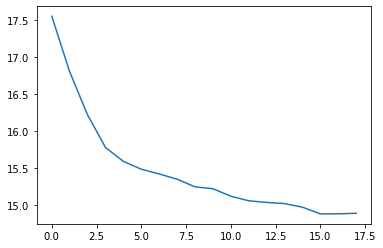

In [40]:
# Tuning edilmemiş halinde en optimal n_neighbors skoru 15 olarak belirledim . grafikte 15'den sonra değişim olmuyor.
plt.plot(RMSE)

## Parametrik Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [43]:
knn = KNeighborsRegressor()

In [44]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [45]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [46]:
knn_cv_model.best_params_

{'n_neighbors': 29}

In [49]:
RMSE = [] 
RMSE_CV = []
for k in range(2,20):
    
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_test, y_test, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 2 için RMSE değeri:  17.551682093755616 RMSE_CV değeri:  17.80738073578387
k = 3 için RMSE değeri:  16.80098249019987 RMSE_CV değeri:  17.000504541136053
k = 4 için RMSE değeri:  16.21792696309404 RMSE_CV değeri:  16.554063529763535
k = 5 için RMSE değeri:  15.779519188921846 RMSE_CV değeri:  16.094320643834852
k = 6 için RMSE değeri:  15.591024633433994 RMSE_CV değeri:  15.855420441055795
k = 7 için RMSE değeri:  15.485498373231481 RMSE_CV değeri:  15.649782105029667
k = 8 için RMSE değeri:  15.421614565412854 RMSE_CV değeri:  15.631372744703931
k = 9 için RMSE değeri:  15.350699337467342 RMSE_CV değeri:  15.513527717382239
k = 10 için RMSE değeri:  15.247792746610823 RMSE_CV değeri:  15.47942713029735
k = 11 için RMSE değeri:  15.222264727955954 RMSE_CV değeri:  15.388487411323252
k = 12 için RMSE değeri:  15.121092007142922 RMSE_CV değeri:  15.324967992350901
k = 13 için RMSE değeri:  15.059367570733183 RMSE_CV değeri:  15.263111292713212
k = 14 için RMSE değeri:  15.03707316343

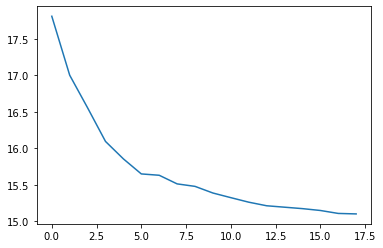

In [50]:
# grafiğe göre neighboors sayısının en optimum değeri 16 olarak seçiyorum. 16 değerinden sonra grafikdeki değişim oranı çok düşük.
plt.plot(RMSE_CV)

# Forex Clustering

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=False)

#### PCA YAPILMASI

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
pca = PCA()

In [147]:
# 20 adet PCA ile bağımsız değişkenlerin varyansının %85ini açıklayabiliyoruz %85ini açıklayabiliyoruz.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:20]

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [148]:
# 20 adet ile %85 e kadar açklayabildiğimiz için 20 komponentli pca oluşturdum
pca = PCA(n_components=20)

In [149]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train=pd.DataFrame(X_reduced_train)
X_reduced_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11.782972,-3.671642,6.108561,-1.600377,-0.118344,-1.166336,-2.009431,-0.194325,2.096551,-2.098880,0.471469,0.243941,0.468606,0.100753,-0.674878,3.214038,1.652439,-0.405728,4.859307,-0.381758
1,12.867333,-3.256447,4.605496,-0.680907,0.123138,-2.115515,-1.985948,-0.311582,1.456761,-2.236197,0.991589,-0.443670,0.156962,0.442437,-0.247789,3.019936,1.634745,-0.742570,5.052538,-0.448065
2,12.950938,-1.609177,3.106801,0.270902,0.269190,-2.289861,-1.133368,-0.602476,0.741730,-2.274293,1.338291,-0.438419,0.427335,0.532960,0.642418,2.368777,2.632490,-1.002360,4.727270,0.308706
3,13.375427,-0.587247,2.131725,0.438473,0.605411,-1.315534,1.305792,-1.067365,-0.103243,-2.185380,1.655953,-0.521839,0.599277,0.654768,1.371067,1.895136,3.441472,-1.298411,4.455509,0.950182
4,17.285364,-3.850312,4.335006,0.152274,0.480757,0.681739,2.611304,-0.862188,0.326322,-3.685148,1.972537,-0.197098,1.270720,-0.066995,1.152770,2.975893,2.259946,-0.318758,5.129695,2.492374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4620,-8.542614,-3.145221,-1.093583,5.095487,2.408852,4.018588,0.239119,-3.113170,-4.249309,2.069282,2.579808,-2.377260,0.692799,-3.784782,1.922612,-0.798485,1.414070,-0.777454,0.261922,1.370936
4621,-4.607246,-7.027109,0.582021,4.176428,2.623461,4.686834,0.671900,-2.944708,-4.143315,2.545345,2.270698,-3.028138,-0.259382,-3.349204,1.055451,-0.729416,1.051702,-1.042438,-0.437090,1.385423
4622,0.946245,-11.007617,1.086379,2.986122,1.528378,3.261530,0.533640,-0.316067,-0.024591,-1.002748,0.333516,-0.140981,-0.304873,3.549965,0.025061,0.577560,0.765111,1.618286,-0.384144,-0.333779
4623,0.442331,-7.816014,-1.941625,5.142684,1.366740,0.214713,-2.890520,0.118129,0.389344,-0.451206,-0.402318,-0.319587,-0.826352,3.993678,-1.052703,0.848623,0.862642,1.117693,-0.449742,-1.216375


In [150]:
# default olarak cluster sayısını 3 olarak seçtim çünkü gerçekte veri zaten 3 gruba ayrılabilir gözüküyordu
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans

KMeans(n_clusters=3)

In [151]:
kmeans?

In [152]:
k_fit = kmeans.fit(X_reduced_train)

In [153]:
kumeler = k_fit.labels_
k_fit.labels_

array([2, 2, 2, ..., 1, 1, 1])

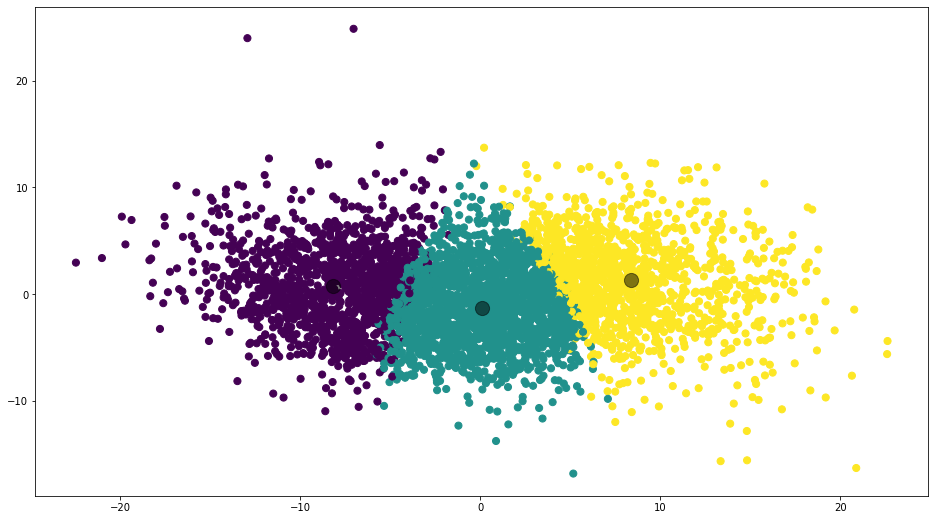

In [154]:
# 3 gruba ayırdığımızda gruplar arası ayrışmanın iyi olduğu gözüküyor. Grafikte İlk iki komponent karşılaştırılmıştır
plt.scatter(X_reduced_train[0], X_reduced_train[1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [155]:
from mpl_toolkits.mplot3d import Axes3D

In [158]:
#!pip install --upgrade matplotlib
import mpl_toolkits

In [159]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(X_reduced_train)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

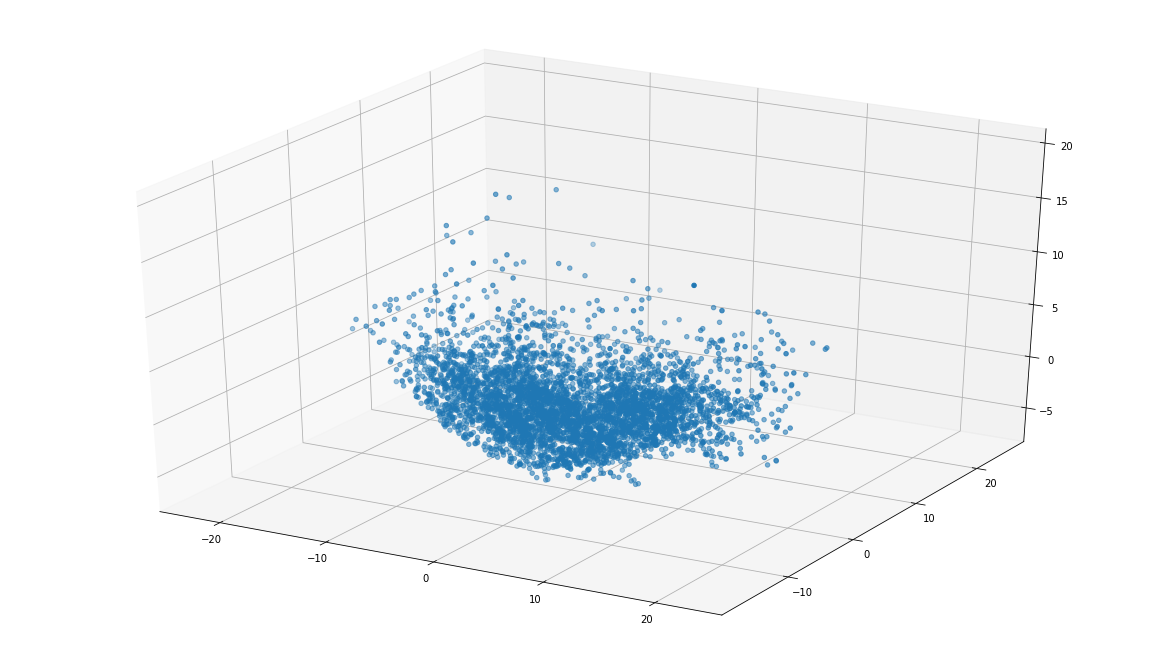

In [160]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced_train[0], X_reduced_train[1],X_reduced_train[2]);

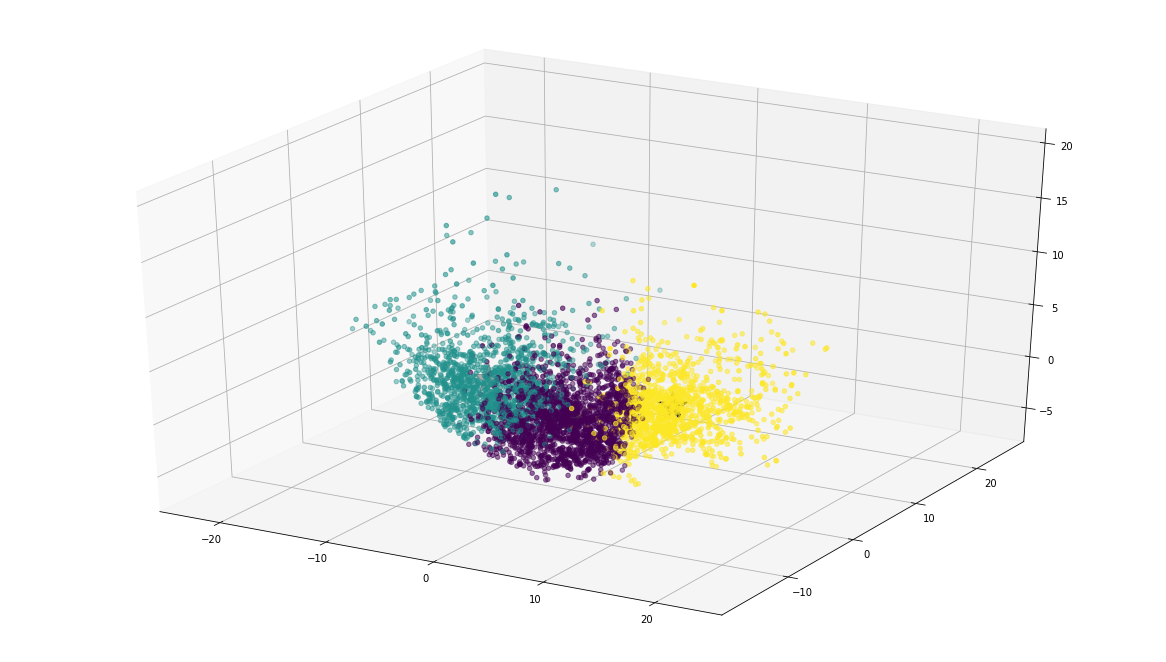

In [161]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced_train[0], X_reduced_train[1],X_reduced_train[2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

## Test verisinin kümelendirilmesi

In [162]:
X_reduced_test = pca.fit_transform(scale(X_test))
X_reduced_test=pd.DataFrame(X_reduced_test)
X_reduced_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.111552,-5.005246,-4.383962,3.087896,2.026455,-0.117071,-1.178448,-0.261351,-1.384603,0.372928,1.106906,-0.279338,1.659727,-0.948935,0.506380,-1.073243,-0.398932,0.033949,0.376235,0.777939
1,1.640908,0.071394,-6.391029,4.037865,2.277627,-0.038319,-1.252083,-0.184589,-1.226335,0.082253,1.116788,-0.772912,0.749469,-0.564926,0.671980,-0.576084,-0.063164,0.029725,0.386862,0.825752
2,1.878405,-0.071319,-5.838272,2.853374,2.426214,-1.039601,0.822595,-0.177736,-1.918296,-0.481430,1.243630,-0.895295,0.202394,-0.704393,1.049296,0.152583,0.196525,-0.060775,-0.298356,0.870897
3,1.535704,-1.192280,-4.540924,1.194931,2.307890,-1.602886,2.236798,0.069853,-1.765931,-0.964672,2.281891,-0.854566,0.039652,-1.023780,0.478711,0.111976,-0.034823,0.328331,0.605928,1.020249
4,-0.149843,-2.923488,-2.717887,0.201067,1.618545,-1.248414,2.595668,-0.837205,-0.463177,-0.992319,2.082286,-1.152395,0.864260,-2.517890,-0.603972,-0.337891,0.490407,0.144024,1.424958,0.935303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,-6.661929,7.546623,3.980228,3.997046,10.585644,9.814905,3.972746,-1.400076,-2.166860,0.975861,0.811338,0.809734,-0.020823,0.963419,-1.474821,-1.350989,4.293160,6.159743,-2.427457,0.242009
1538,-6.184643,7.069848,4.842406,3.145175,10.602603,9.187590,5.240212,-1.383504,-2.430597,0.583962,0.808793,0.766946,-0.349855,0.673054,-1.088278,-0.838234,4.535499,6.019532,-3.208146,0.155653
1539,-8.706495,3.286392,7.053120,2.006651,10.328293,8.360936,6.610508,-1.462056,-2.601218,0.844758,1.687549,1.214397,0.411213,0.409498,-2.161188,-1.678614,3.796197,6.349466,-2.146354,0.049464
1540,-11.940448,0.777156,10.201998,3.259481,14.059989,13.086524,7.911803,-1.236537,-1.541475,2.889722,1.843761,0.248433,0.515154,0.559206,-2.025718,1.056980,-0.784332,1.135317,-0.878118,-0.608144


In [189]:
import sys
test_kumeler=kmeans.predict(X_reduced_test)
dfKumeler = pd.DataFrame(test_kumeler)
dfKumeler.head(30)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [190]:
X_reduced_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.111552,-5.005246,-4.383962,3.087896,2.026455,-0.117071,-1.178448,-0.261351,-1.384603,0.372928,1.106906,-0.279338,1.659727,-0.948935,0.506380,-1.073243,-0.398932,0.033949,0.376235,0.777939
1,1.640908,0.071394,-6.391029,4.037865,2.277627,-0.038319,-1.252083,-0.184589,-1.226335,0.082253,1.116788,-0.772912,0.749469,-0.564926,0.671980,-0.576084,-0.063164,0.029725,0.386862,0.825752
2,1.878405,-0.071319,-5.838272,2.853374,2.426214,-1.039601,0.822595,-0.177736,-1.918296,-0.481430,1.243630,-0.895295,0.202394,-0.704393,1.049296,0.152583,0.196525,-0.060775,-0.298356,0.870897
3,1.535704,-1.192280,-4.540924,1.194931,2.307890,-1.602886,2.236798,0.069853,-1.765931,-0.964672,2.281891,-0.854566,0.039652,-1.023780,0.478711,0.111976,-0.034823,0.328331,0.605928,1.020249
4,-0.149843,-2.923488,-2.717887,0.201067,1.618545,-1.248414,2.595668,-0.837205,-0.463177,-0.992319,2.082286,-1.152395,0.864260,-2.517890,-0.603972,-0.337891,0.490407,0.144024,1.424958,0.935303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,-6.661929,7.546623,3.980228,3.997046,10.585644,9.814905,3.972746,-1.400076,-2.166860,0.975861,0.811338,0.809734,-0.020823,0.963419,-1.474821,-1.350989,4.293160,6.159743,-2.427457,0.242009
1538,-6.184643,7.069848,4.842406,3.145175,10.602603,9.187590,5.240212,-1.383504,-2.430597,0.583962,0.808793,0.766946,-0.349855,0.673054,-1.088278,-0.838234,4.535499,6.019532,-3.208146,0.155653
1539,-8.706495,3.286392,7.053120,2.006651,10.328293,8.360936,6.610508,-1.462056,-2.601218,0.844758,1.687549,1.214397,0.411213,0.409498,-2.161188,-1.678614,3.796197,6.349466,-2.146354,0.049464
1540,-11.940448,0.777156,10.201998,3.259481,14.059989,13.086524,7.911803,-1.236537,-1.541475,2.889722,1.843761,0.248433,0.515154,0.559206,-2.025718,1.056980,-0.784332,1.135317,-0.878118,-0.608144


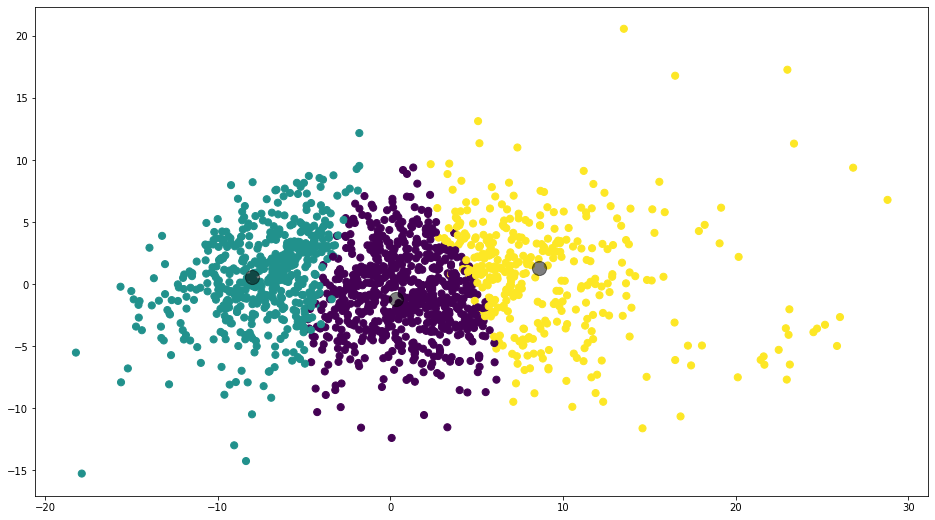

In [164]:
# 3 kümeye ayırdığımımzda verier grafikteki gibi ayrışıyor
plt.scatter(X_reduced_test[0], X_reduced_test[1], c = test_kumeler, s = 50, cmap = "viridis")

test_merkezler = k_fit.cluster_centers_

plt.scatter(test_merkezler[:,0], test_merkezler[:,1], c = "black", s = 200, alpha = 0.5);

### Kümelenmenin test verisi üzerinde tahmini ver gerçekte olan "negatif" " nötr" ve " pozitif " olarak ayrışan gerçek kümelenme ile karşılaştırılması

In [254]:
y_test_labeled=y_test.copy()

In [255]:
#y_test_labeled.index=range(len(y_test_labeled))

In [256]:
y_test_labeled.values[0]

14.85572873

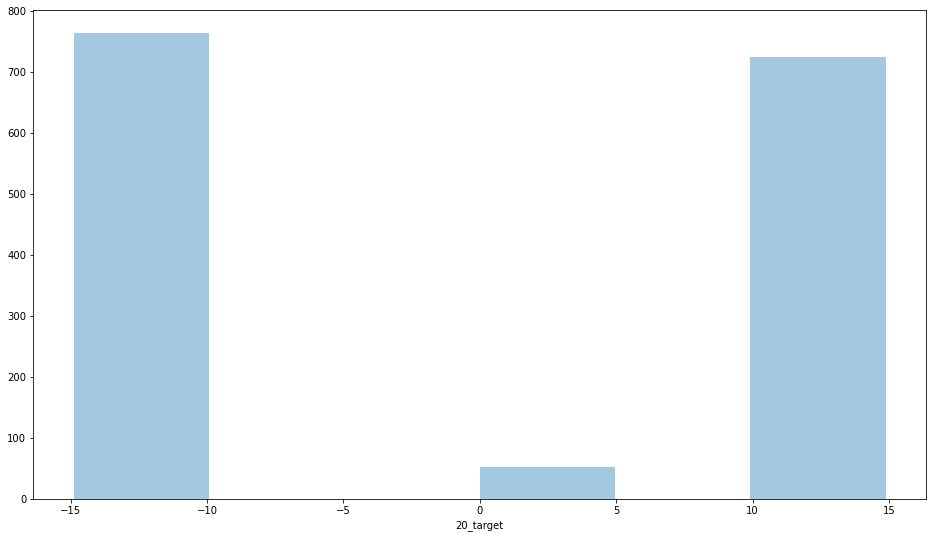

In [257]:
sns.distplot(y_test_labeled,kde = False)

In [258]:
# Verilerin negatif nötr ve pozitif olarak ayrılması
for i in range (len(y_test_labeled)):
    if ((y_test_labeled.values[i] > -20) & (y_test_labeled.values[i] < -8)):
        y_test_labeled.values[i] = int(0)
    elif ((y_test_labeled.values[i] > -5 )& (y_test_labeled.values[i] < 6)):
        y_test_labeled.values[i] = int(1)
    elif ((y_test_labeled.values[i] > 7) & (y_test_labeled.values[i] < 30)):
        y_test_labeled.values[i] = int(2)
    

In [260]:
y_test_labeled=y_test_labeled.astype(int)
#y_test_labeled.index=range(len(y_test_labeled))
y_test_labeled.head(30)

4625    2
4626    2
4627    2
4628    2
4629    2
4630    2
4631    2
4632    2
4633    2
4634    2
4635    2
4636    2
4637    2
4638    2
4639    2
4640    2
4641    0
4642    0
4643    0
4644    0
4645    0
4646    2
4647    2
4648    0
4649    2
4650    2
4651    2
4652    0
4653    0
4654    0
Name: 20_target, dtype: int32

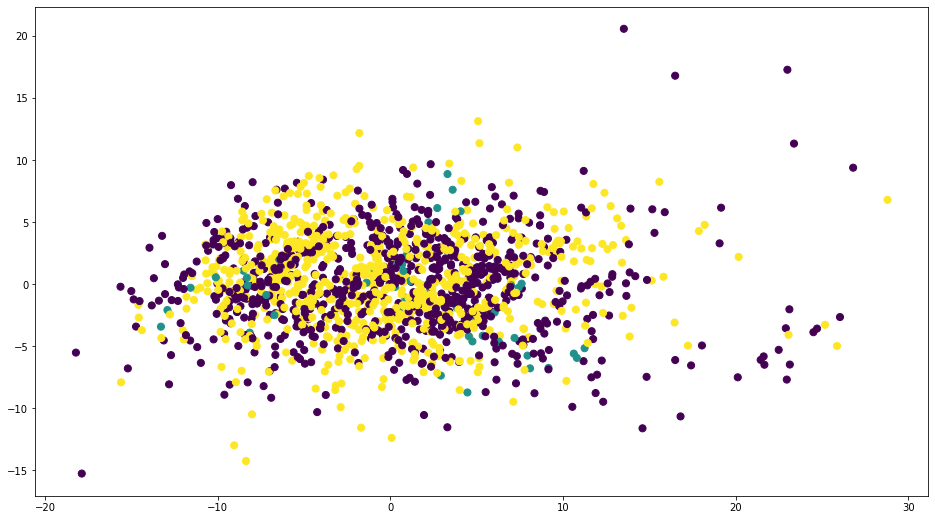

In [275]:
# bu grafik , komponentlerin gerçekte nasıl kümelenmiş olması gerektiğini gösteriyor. 
# bu grafiği ele alırsak , modelimiz kümelendirme konusunda başarılı olmamış gözüküyor.
# yukarıdaki grafikte görüldüğü gibi bir ayrışma söz konusu değil
plt.scatter(X_reduced_test[0], X_reduced_test[1], c = y_test_labeled, s = 50, cmap = "viridis")


## BANKA VERİSİ KNN CLASSIFICATION UYGULAMASI

In [333]:
bankaDataOrj = pd.read_csv("hmelq.csv")

In [334]:
bankadf = bankaDataOrj.copy()

In [335]:
bankadf.head(1)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042


In [336]:
# nulları atınca satır sayısı 3576 dan 2018 e düştü
bankadf=bankadf.dropna()
bankadf.head(5)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [337]:
# oluşturduğum sınıf ile kategorik değişkenlerin belirlenmesi
classData = DataInspect(bankadf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("bad")

In [338]:
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [3, 4]
Object tipindeki kolon isimleri : ['reason', 'job']


In [339]:
# verinin X ve y olarak ayrımı
X= bankadf.drop("bad",axis = 1 )
y = bankadf["bad"]

In [340]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [341]:
# OLUŞTURDUĞUM sınıf tarafından belirlenen kategorik değişkenlerin dummy dönüşümü yapılması
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        objColumnNames)], 
                                      remainder='passthrough') 
  
X = np.array(columnTransformer.fit_transform(X), dtype = np.str) 

In [342]:
X = pd.DataFrame(X)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.458999999999996
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


### MODEL KURULUMU

### Modelleri kurmadan önce kendi oluşturduğum classification sınıfı ile , 7 tane classification algoritması ile verinin tahminini yapıp sonuçları yazdıracağım.

### MasterModel

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [367]:
newmdl= model.masterClassification(X_train,y_train,X_test,y_test)

In [368]:
# sonuca göre, default değerlerde en iyi sınıflandırmayı gradient boosting classifier yapmakta
newmdl

,Modeller,Accuracy
0,KNeighborsClassifier,92.277228
0,LogisticRegression,92.277228
0,SVC,92.277228
0,GaussianNB,90.495050
0,DecisionTreeClassifier,94.059406
0,RandomForestClassifier,95.643564
0,GradientBoostingClassifier,96.435644


## Manuel Model Kurulumu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [308]:
KNeighborsClassifier?

In [304]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [305]:
y_pred = knn_model.predict(X_test)

In [306]:
accuracy_score(y_test, y_pred)

0.9227722772277228

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       466
           1       0.50      0.10      0.17        39

    accuracy                           0.92       505
   macro avg       0.71      0.55      0.56       505
weighted avg       0.90      0.92      0.90       505



## Tuning

In [309]:
knn_params = {"n_neighbors": np.arange(1,50),
              "weights": ["uniform","distance"],
             "leaf_size":[20,30,40]}

In [310]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [311]:
knn_cv.best_params_

{'leaf_size': 20, 'n_neighbors': 34, 'weights': 'distance'}

In [313]:
knn = KNeighborsClassifier(leaf_size=20,n_neighbors=34,weights="distance")
knn_tuned = knn.fit(X_train, y_train)

In [315]:
y_pred = knn_tuned.predict(X_test)

In [316]:
accuracy_score(y_test, y_pred)

0.9247524752475248

In [318]:
# precision artmış durumda ancak 1 leri tahmin etmede güçlük çekiyor model. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       1.00      0.03      0.05        39

    accuracy                           0.92       505
   macro avg       0.96      0.51      0.51       505
weighted avg       0.93      0.92      0.89       505

